# Session 5

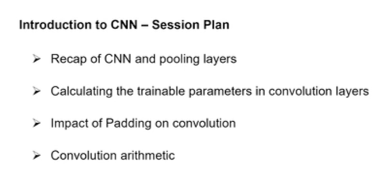

With Vanilla neural n/w flattening

1. would lose spacial information, positioning of all pixel values is extremely important.
2. would increase trainable parameters.

So we go for CNN-Convolution Neural n/w's, on top of vanilla neural n/w. In general CNN is for feature extraction comprises of 2 layers- convolutional (extract features) & pooling layer (reduces size of image). 3 types of pooling - average, max and min pooling.

## Recap previous sessions

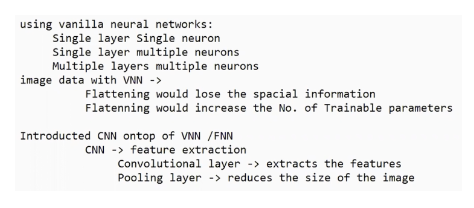

## CNN Architecture

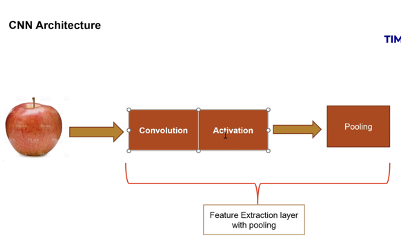

When we say architecture we expect it to follow some fixed criteria. In case of neural n/w or CNN u can say it follows an architecture template instead of architecture. You don't have a fixed number of layers but u can have 'n' number of convolution layers & there is no mandate that pooling layer should follow a convolution layer.

Pooling layers r used to reduce size of image, it is generally seen in initial layers, later layers, pooling might completely be skipped.

Is it mandatory to go for activation ? No. If u want some non-linearity for faster convergence go for activation else skip that activation.

**<font color=blue>Role of Bias**

A matrix/kernel of 3 by 3 will have 9 random weights and a bias. Significance of bias - if line is y=mx i.e. bias =0 then line will always pass through origin. We cannot assume it will pass through origin always, so to add flexibility we add bias.

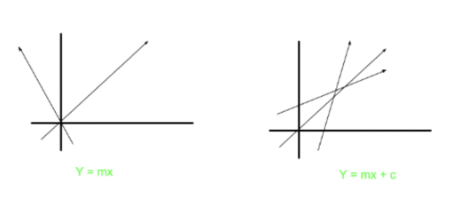

**<font color=blue>Role of activation function**

After convolution operation o/p is completely linear,linear o/p's r dangerous they do not converge soon that is d problem. So u can add a non-linear activation like RelU.

RelU takes i/p value from 0 to infinity, so it preserves information in middle layers. For Softmax and Sigmoid they squish the o/p b/w 0 and 1, hence used in o/p layer where we might need prababilistic o/p of prediction.

**<font color=blue>Convolution**

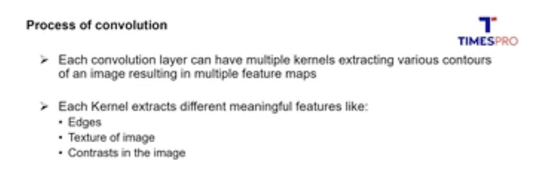

**<font color=blue>Pooling**

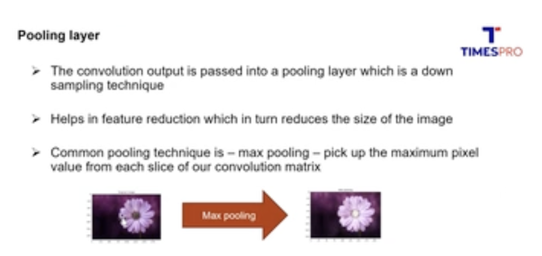

*Note - At programming level we r not worried about size of image in mb's and gb's, we r worried about reduction in size in terms of matrix size (rows and columns) but yes if u reduce size of matrix but obvious it will reduce the size of space it consumes in memory.*

*Note - Kernel in Pooling layer does not have any weights and biases unlike the kernel in the convolution layer, it is just picking maximum values from the o/p of convolution matrix.*

*<b><font color=blue> Architecture and Data r seperate</b>*

<font color=blue>1 filter will result in 1 feature map, we r not worried about how many images/data points pass through that filter

At architecture level we r not worried about how many images we have we'll keep that aside. Anywhere while designing a neural n/w we r not worried how many data points will come in, we r only worried in terms of how many features/columns r there.

**The same technnique defined in the architecture will be applied for all.** When data comes in it is upto us if want to pass it in mini-batches, in that case after every batch of images the weight of filter gets updated.

When we design, we design a generic architecture irrespective of how many r images r fed in, its not for any particular image, for any image in general we will have the same architecture.

## Trainable Parameters Formula's

Trainable Parameters in the Convolution layers

Just like Flatten layer there are no trainable parameters in Pooling layer. 

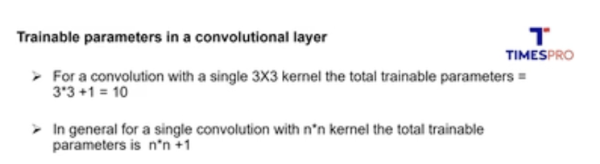

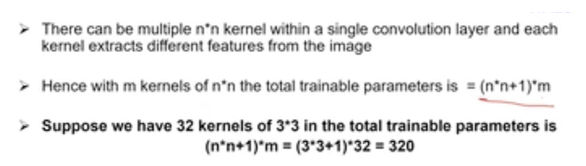

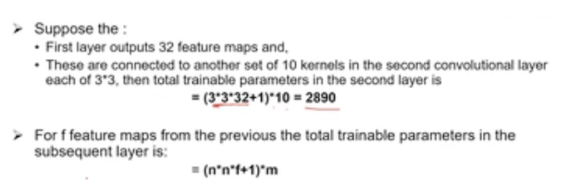

Pooling layer gives you an output(reduced image/matrix) but there r no trainable parameters.

### Formula's

## 1. $(n*n+1)*m$ - for 1st convolution layer


## 2. $(n*n*f+1)*m$ - for 2nd / middle convolution layers




- where n is the filter/kernel size
- where f is the number of feature maps output from previous layer
- m is number of filters in current layer
- 1 is bias

## Trainable Parameters affected by-

In a Convolutional Neural Network (CNN), the number of trainable parameters is affected by several factors, primarily the architecture and hyperparameters of the convolutional layers, and to some extent the fully connected layers. Here's a breakdown:

### Convolutional Layers

1. **Number of Filters/Kernels**: More filters mean more trainable parameters. Each filter has its own set of weights.
   
2. **Size of Filters/Kernels**: A bigger kernel size (e.g., 5x5 compared to 3x3) increases the number of trainable parameters. Specifically, if the kernel size is \(k \times k\), then each filter has \(k \times k\) weights.

3. **Input Channels**: The number of channels in the input image (or the output from the previous layer, for layers beyond the first) also impacts the number of trainable parameters. For each filter, a \(k \times k\) set of weights must be learned for each input channel.
   
4. **Bias Terms**: Typically, each filter has one bias term. So, if there are \(N\) filters, you will have \(N\) bias terms.

The number of parameters for a single convolutional layer can be calculated as:

\[
\text{Parameters} = (\text{Kernel Height} \times \text{Kernel Width} \times \text{Input Channels} + 1) \times \text{Output Channels}
\]

The "+1" accounts for the bias term for each output channel.

### Fully Connected (Dense) Layers

1. **Number of Neurons**: More neurons in the fully connected layer mean more trainable parameters.

2. **Previous Layer’s Output**: The number of neurons in the previous layer (whether it's another fully connected layer or a flattened convolutional layer) impacts the number of trainable parameters.

For each fully connected layer, if there are \(N\) neurons and \(M\) neurons in the previous layer, the number of trainable parameters is \(N \times M\) for the weights plus \(N\) for the bias terms.

### Other Factors

1. **Batch Normalization**: If used, adds 4 parameters per feature map (gamma, beta, moving mean, and moving variance), of which only gamma and beta are trainable.

2. **Dropout, Pooling, Activation Functions**: These generally do not add trainable parameters but can influence the model's performance and thus indirectly the effectiveness of the trainable parameters.

3. **Recurrent Connections**: If your network architecture involves recurrent connections (e.g., ConvLSTMs), then those will also introduce additional trainable parameters.

4. **Skip Connections and Concatenations**: These architectural choices themselves do not add trainable parameters but can change the number of features being input to subsequent layers, thus affecting their number of trainable parameters.

Understanding these factors can help you design your network more effectively and can also help you debug issues related to overfitting or underfitting.

### Example

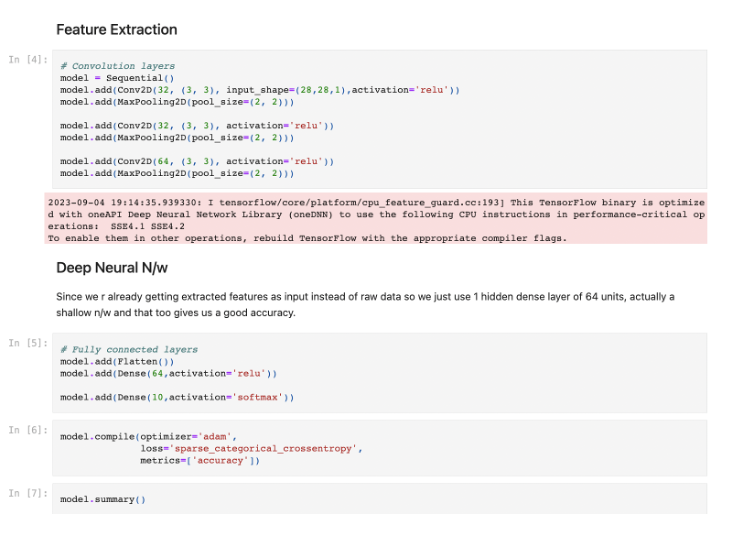

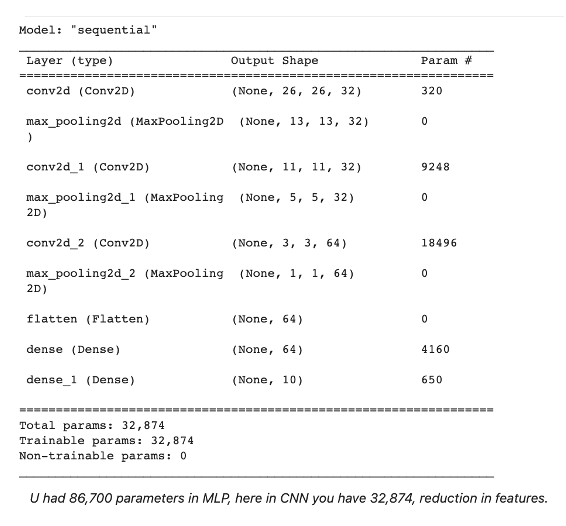

- Above first convolution layer we get 320 parameters as -

$(n*n+1)*m$

$((3*3)+1)*32 = 320$


- Second convolution layer 

$(n*n*f+1)*m$

$(3*3*32+1)*32 = 9248$

- Third convolution layer

$(n*n*f+1)*m$

$(3*3*32+1)*64 = 18496$

- First Dense layer

$64*64+64 = 4160$


- Second Dense layer

$(64*10+10) = 650$

## Size of Output Feature Map Formula's

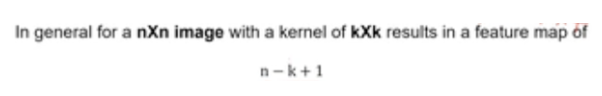

For MNIST model above the Output shape is as follows-

- First convolution layer-

$n-k+1$

$28-3+1 = 26$

- Second convolution layer-

$n-k+1$

$13-3+1 = 11$

- Third convolution layer-

$n-k+1$

$5-3+1 = 3$

*Note - If we r making any changes to r model architecture we will have to re-initialize, re-compile and then re-train to start training from beginning.Dont just run fit 2nd time, u will have to re-initialize, re-create the architecture, compile and then start training*

All of this process happens together, whenever u r training model, u pass images in batches, u dont pass all images together.

We pass in batches & each batch size by default is 32. After every batch, filter weights will be updated based on set of images passed till that time, then when entire dataset is complete, that will be considered weights for filter for that epoch (when 1 whole dataset is traversed). 1 filter with final weights will be ready when lets say 10 epochs r defined for this problem, so 10 times the final filter values will be there at end of each epoch & 10th epoch weights will be final filter weights to give feature map.

Similar process for more number of filters.

### Why do we give batch size while training neural n/w?

Since everything runs in memory so lets say ur memory size is 4gb and you have dataset of 6gb so in this case u will not be able to feed all images to train together, u give in batches.

1 epoch is divided into many batches depending of size of dataset. For e.g. in case of MNIST it is 1500 batches as shown below-

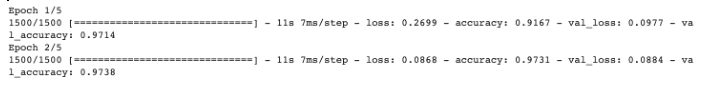

Out of 60K training data, 0.20% i.e. 12K is validation so we r left with 48K. So $48000/12=1500$ batches.

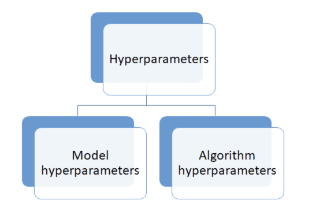

*Please refer to for details on Model (architecture related parameters specific to each ML algo) and Algorithm hyperparameters (optimization algo parameters for faster convergence during training of model) -*

https://github.com/sylvia0912/times_9_neural_networks/blob/main/L7_Keras_tuner.ipynb

## Padding

Convolution not just extracts features it also does some kind of shrinking and there will be further more shrinking with the max pooling. Is that much shrinking required?

So we pad the image first and then convolve it so image size is not reduces atleast during convolution. During pooling anyways it will be reduced to half anyways.

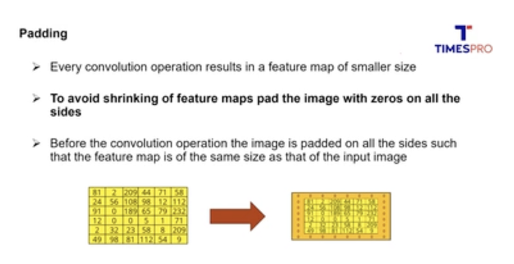

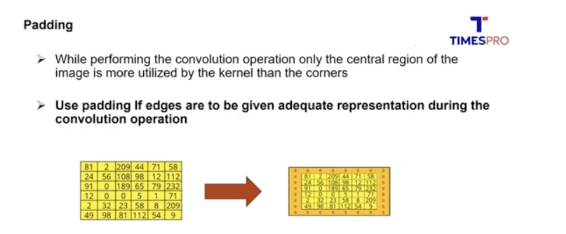

When we convolve kernel over image, the edges r going to be least represented, exactly once. Sometimes when recognising object, it play v.vital role. If edges have background then not imp but if edges have some part of image it could be v.useful information.

Our brain also works like that, while recognising image we focus on edges. We can't at times afford to lose those edges.

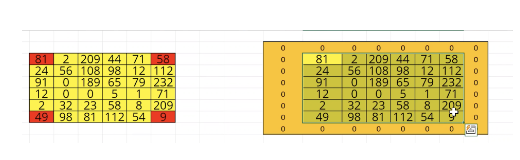

So two main reasons for using padding are -

1. Size of image is not reduced after convolution
2. Edges can be given adequate representation during convolution operation of sliding. So padding by 0 takes care of that.

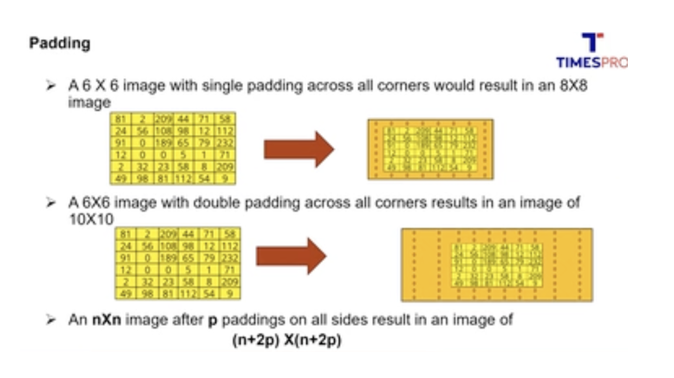

### Image size after padding formula 


### $(n+2p)*(n+2p)$


You ur image is no longer $n*n$ it becomes $n+2p$ after padding.

## Size of Output Feature Map Formula's after Padding

### $(n+2p)-k+1$

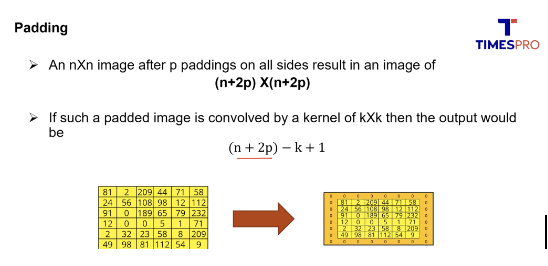

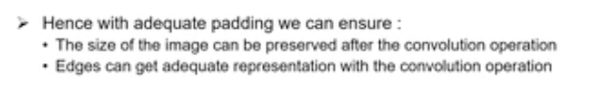

In CNN we r reducing size of image, things r going to be faster, size of image decides number of trainable parameters what u pass to fully connected layer, it has dependency over there. $256*256$ becomes large u squeezed, when squeezed it plays a predominant role, we will pad them so edges get good representation while we r performing sliding operation during convolution.

## Stride

Practical Implications:
Higher Resolution: Because the window moves only one pixel at a time, you get a more detailed, higher-resolution output feature map.

Computational Cost: A stride of 1 means more overlapping between windows, resulting in more calculations. This increases the computational cost and memory usage.

Parameter Count: Although stride itself doesn't affect the number of trainable parameters, having a higher-resolution feature map as output could impact the number of parameters in subsequent layers of the network.

Overfitting Risk: With more detailed feature maps, the model may fit the training data too closely, risking overfitting. However, this can be mitigated through techniques like dropout, regularization, or using a simpler model architecture.

Choosing the right stride value is a balance between retaining useful information and managing computational resources effectively. A stride of 1 is often a good starting point, but depending on the specific problem and computational constraints, other values might be more appropriate.